In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.models import load_model, model_from_json

from matplotlib import pyplot
from scipy.misc import toimage
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.layers import Dense, Dropout, Activation, Flatten
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

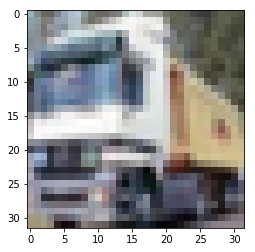

In [3]:
pyplot.imshow(toimage(X_train[1]))

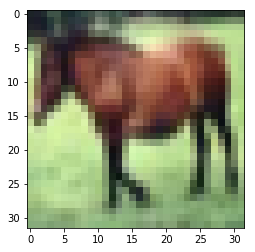

In [4]:
pyplot.imshow(toimage(X_train[7]))

In [3]:
X_train= X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

output_size = y_train[0].size

In [5]:
input_shape = X_train.shape[1:]
print(input_shape)

(32, 32, 3)


In [6]:
out_shape = y_test.shape[1]
print(out_shape)

10


In [7]:
model = Sequential()
model.add(Convolution2D(32,3,3, input_shape=input_shape, activation = 'relu'))
model.add(Dense(288, activation = 'relu', init='normal'))
model.add(Convolution2D(32, 3, 3,  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(32, 3, 3,  activation = 'relu'))
model.add(Flatten())
model.add(Dense(out_shape, activation = 'relu', init='normal'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])


## Warning: Code below can take a LOOOOONNNGGG time

Feel free to skip to the *Load Precalculated weights* section below

In [17]:
model.fit(X_train, y_train, nb_epoch = 10)

Epoch 1/1
50000/50000 [==============================] - 1290s - loss: 1.1921e-07 - acc: 0.1000     

In [18]:
score = model.evaluate(X_test, y_test)
100 - score[1] * 100

10000/10000 [==============================] - 100s     

90.0

## Save Model & Weights to Disk



In [ ]:
model_json = model.to_json()
with open("model_mine.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cifar_mine.h5")
print("Saved model to disk")


## Load Precalculated weights

Based on a 200 epoch run on a 12 core server, running over 8 hours

In [8]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")                    

In [21]:
import scipy.misc
images = ["ship.jpg", "truck.jpg", "car.jpg", "cat.jpg", "dog.jpg", "horse.jpg"]

for i in images:
    image = scipy.misc.imread(i)
    image = scipy.misc.imresize(image, (32,32)).astype('float32')

    image = np.array(image / 255)

    image = image.reshape( (1,) + image.shape )

    prediction = loaded_model.predict((image))

    cifar10classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
    print("Prediction for ", i, " : ", cifar10classes[np.argmax(prediction)])

Prediction for  ship.jpg  :  ship
Prediction for  truck.jpg  :  automobile
Prediction for  car.jpg  :  automobile
Prediction for  cat.jpg  :  horse
Prediction for  dog.jpg  :  frog
Prediction for  horse.jpg  :  horse


In [22]:
image.shape

(1, 32, 32, 3)